## 라이브러리 import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## 주파수 f, 각주파수 w 정의

In [2]:
f1 = 2  # 주파수 입력
f2 = 3
f3 = 5
f4 = 21
f5 = 30

w1 = 2*np.pi*f1  # w = 2pi*f
w2 = 2*np.pi*f2
w3 = 2*np.pi*f3
w4 = 2*np.pi*f4
w5 = 2*np.pi*f5

In [3]:
amp1 = 1
amp2 = 7
amp3 = 4
amp4 = 10
amp5 = 8

In [4]:
print("f1 =",f1, "/ f2 =",f2, "/ f3 =",f3, "/ f4 =",f4, "/ f5 =",f5 )
print("w1 =",w1, "/ w2 =",w2, "/ w3 =",w3, "/ w4 =",w4, "/ w5 =",w5 )
print("amp1 =", amp1, "/ amp2 =", amp2, "/ amp3 =", amp3, "/ amp4 =", amp4, "/ amp5 =", amp5)

f1 = 2 / f2 = 3 / f3 = 5 / f4 = 21 / f5 = 30
w1 = 12.566370614359172 / w2 = 18.84955592153876 / w3 = 31.41592653589793 / w4 = 131.94689145077132 / w5 = 188.49555921538757
amp1 = 1 / amp2 = 7 / amp3 = 4 / amp4 = 10 / amp5 = 8


## 샘플링 주파수, 이산함수 정의 및 그래프

In [5]:
t = np.arange(0,10,0.01)   # sampling freq : 100 Hz // sampling time : 10 seconds
# t = np.arange(0, 10, 0.001)  # sampling freq : 1000 Hz

x1 = amp1*np.sin(w1*t)
x2 = amp2*np.sin(w2*t)
x3 = amp3*np.sin(w3*t)
x4 = amp4*np.sin(w4*t)
x5 = amp5*np.sin(w5*t)

t.shape

(1000,)

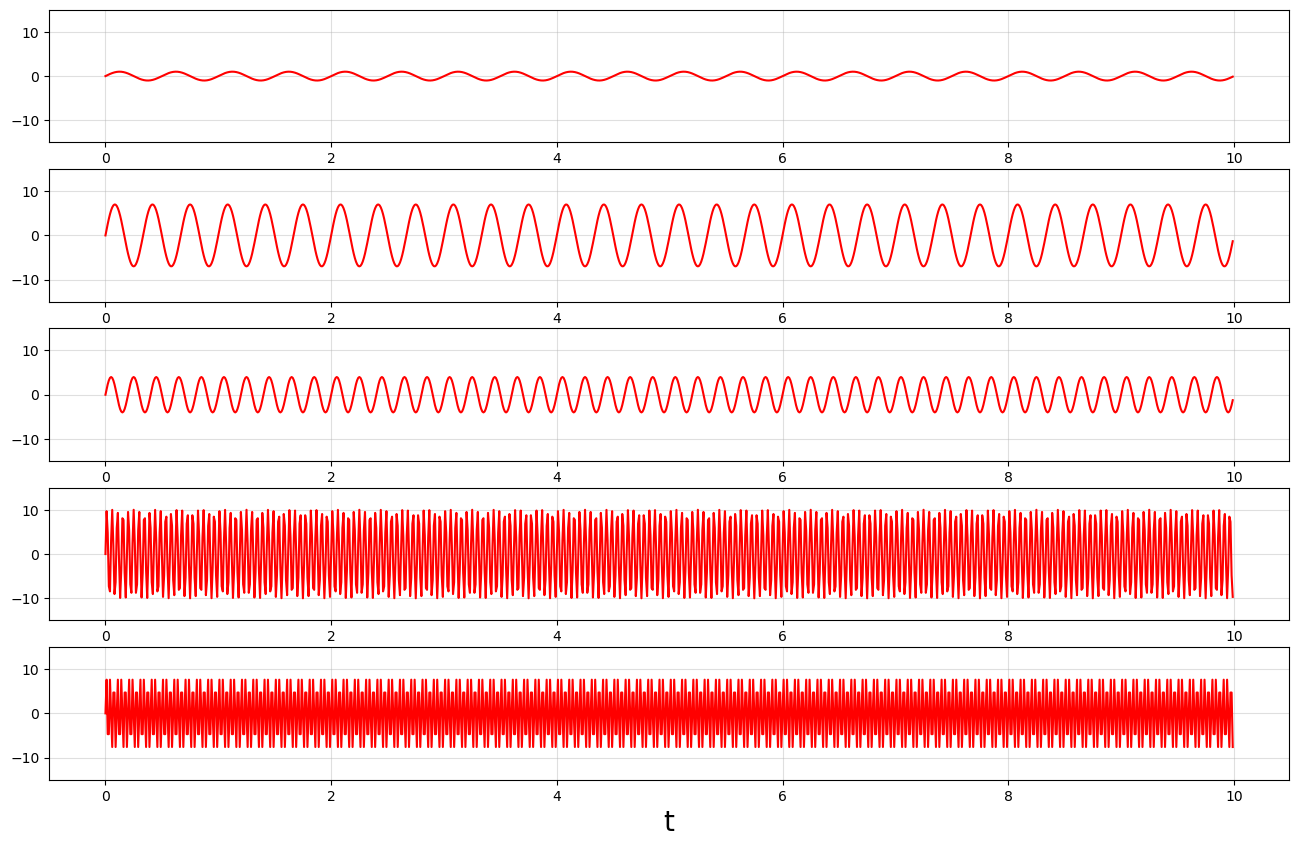

In [6]:
# 정현파 신호 그래프 확인하기
plt.figure(figsize=(16,10))

plt.subplot(5,1,1)
plt.plot(t, x1, 'r-')
plt.ylim(-15, 15)
plt.grid(alpha = 0.4)

plt.subplot(5,1,2)
plt.plot(t, x2, 'r-')
plt.ylim(-15, 15)
plt.grid(alpha = 0.4)

plt.subplot(5,1,3)
plt.plot(t, x3, 'r-')
plt.ylim(-15, 15)
plt.grid(alpha = 0.4)

plt.subplot(5,1,4)
plt.plot(t, x4, 'r-')
plt.ylim(-15, 15)
plt.grid(alpha = 0.4)

plt.subplot(5,1,5)
plt.plot(t, x5, 'r-')
plt.ylim(-15, 15)
plt.grid(alpha = 0.4)

plt.xlabel('t',fontsize=20)
plt.show()

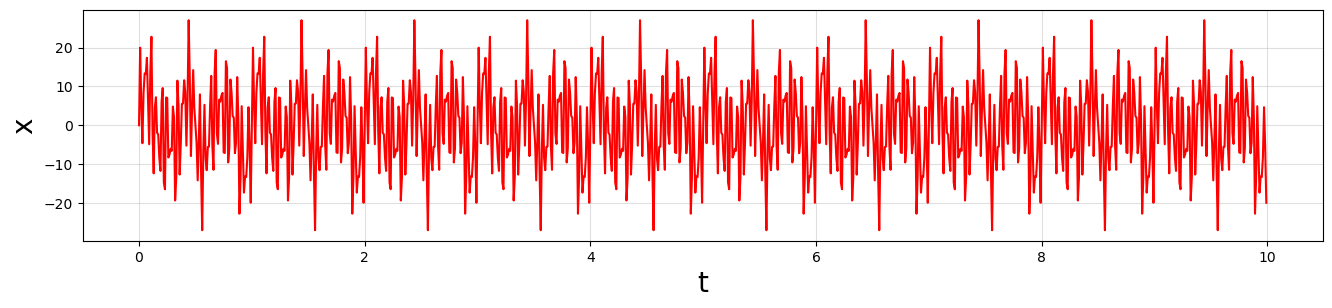

In [7]:
x = x1 + x2 + x3 + x4 + x5 # 정현파 모두 합성

plt.figure(figsize=(16,3))
plt.plot(t, x, 'r-')
plt.xlabel('t',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.grid(alpha = 0.4)
# plt.xlim(0,1)
plt.show()

## FFT 실행

Sampling frequency 계산 : Fs = 데이터 개수/시간

In [8]:
Fs = int(len(t)/t[-1])
Fs

100

FFT 연산

* f0: 주파수 정보 (x 값)
* amp_Hz: 주파수 별 진폭 (y 값)

In [9]:
# Compute FFT

NFFT   =  len(x)                              # length of signal > NFFT = 2 ^ nextpow2(length(y)) 
k      =  np.arange(NFFT)
f0     =  k * Fs / NFFT                      # Double sides Frequency range
f0     =  f0[range(math.trunc(NFFT/2))]      # Single side  Frequency range

Y      =  np.fft.fft(x)/NFFT                 # FFT computing and normalization
Y      =  Y[range(math.trunc(NFFT/2))]       # Single side  Frequency range
amp_Hz =  2 * abs(Y)

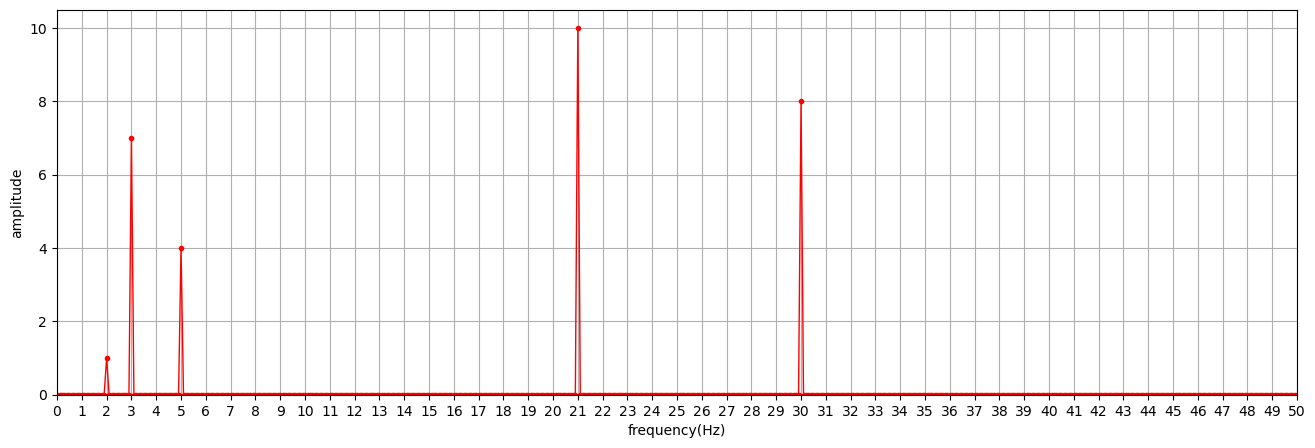

In [10]:
plt.figure(figsize=(16,5))
plt.plot(f0,amp_Hz,'r.-', lw=1)
plt.xlim(0, Fs/2)
plt.ylim(0)
plt.xticks(np.arange(0,(Fs/2)+1))
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()